# Comparing Likelihoods

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys, inspect
cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder + '/carl')

In [2]:
#zi_dec = np.loadtxt('pbyp_sm_19var_den8.txt')
#zi_nodec = np.loadtxt('dec_sm_sub_den8.txt')
llr_pbyp_19var = np.loadtxt('pbyp_sm_19var_den8.txt')
llr_pbyp_2var = np.loadtxt('pbyp_sm_2var_den8.txt')
llr_decomp_19var = np.loadtxt('dec_sm_sub_den8.txt')


In [3]:
theta = [[1.0, -0.5, -0.5], 
         [1.0, -0.5, 0.5], 
         [1.0, -0.35714285714285715, -0.071428571428571452], 
         [1.0, -0.35714285714285715, 0.21428571428571419], 
         [1.0, -0.2142857142857143, -0.2142857142857143], 
         [1.0, -0.2142857142857143, 0.071428571428571397], 
         [1.0, -0.2142857142857143, 0.3571428571428571], 
         [1.0, -0.071428571428571452, -0.35714285714285715], 
         [1.0, -0.071428571428571452, -0.071428571428571452], 
         [1.0, -0.071428571428571452, 0.21428571428571419], 
         [1.0, 0.21428571428571419, -0.2142857142857143], 
         [1.0, 0.21428571428571419, 0.071428571428571397], 
         [1.0, 0.3571428571428571, 0.5], 
         [1.0, 0.5, -0.071428571428571452], 
         [1.0, 0.5, 0.21428571428571419],
         [1.0, -0.5, -0.35714285714285715], 
         [1.0, -0.5, -0.071428571428571452], 
         [1.0, -0.5, 0.3571428571428571], 
         [1.0, -0.2142857142857143, -0.071428571428571452], 
         [1.0, -0.2142857142857143, 0.21428571428571419], 
         [1.0, -0.2142857142857143, 0.5], 
         [1.0, -0.071428571428571452, -0.5], 
         [1.0, -0.071428571428571452, -0.2142857142857143], 
         [1.0, -0.071428571428571452, 0.071428571428571397], 
         [1.0, 0.071428571428571397, -0.071428571428571452], 
         [1.0, 0.071428571428571397, 0.3571428571428571], 
         [1.0, 0.21428571428571419, -0.35714285714285715], 
         [1.0, 0.21428571428571419, 0.21428571428571419], 
         [1.0, 0.5, -0.2142857142857143], 
         [1.0, 0.5, 0.5],
         [1.0, 0.0, 0.0]]

theta = np.array(theta)

feature_names = ["minDelR_jZ", "DelPhi_Hjj", "DelEta_Hjj", "DelPhi_jj", "DelR_jj", 
                 "DelY_jj", "Mjj", "DelPt_jj", "DelPt_ZZ", "pT_Hjj", "Mjets", "Zeppetaj3", 
                 "ZeppetaZZ", "njets","Z1_E","Z1_pt","Z1_eta","Z1_phi","Z1_m","Z2_E","Z2_pt",
                 "Z2_eta","Z2_phi","Z2_m",  "higgs_E","higgs_pt","higgs_eta","higgs_phi","higgs_m", 
                 "jet1_E","jet1_eta","jet1_y","jet1_phi","jet1_pt","jet1_m","jet2_E", "jet2_eta","jet2_y", 
                 "jet2_phi","jet2_pt","jet2_m","jet3_E","jet3_eta","jet3_y" ,"jet3_phi","jet3_pt","jet3_m"]
# subset = [33] #jet1_pt
observed = 30
theta1 = 8
# Change this to you own data folder
base_dir = "/afs/cern.ch/work/j/jpavezse/private/data/full_data/"

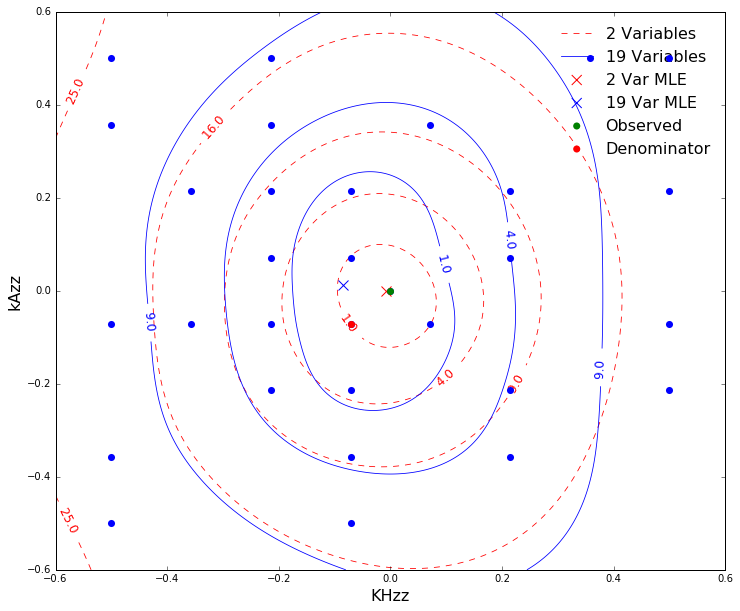

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
plt.rcParams["figure.figsize"] = (12, 10)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, Matern

# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.1f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.1f' % self.__float__()
        else:
            return '%.1f' % self.__float__()

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r '
else:
    fmt = '%r '

gp = GaussianProcessRegressor(alpha=0.0, normalize_y=True, 
                              kernel=C(1.0) * Matern(1.0, length_scale_bounds="fixed"))
#gp.fit(np.delete(theta[:29, 1:],8,0), np.delete(llr,8))
gp.fit(theta[:29, 1:], llr_pbyp_19var)

xi = np.linspace(-0.6, 0.6, 500)
yi = np.linspace(-0.6, 0.6, 500)
    
xx, yy = np.meshgrid(xi, yi)
zz, std = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
zi = zz.reshape(xx.shape)

mle1 = np.unravel_index(zi.argmin(),zi.shape)
zi -= zi[mle1]
zi *= 2.
cs1 = plt.contour(xi, yi, zi, [1.,4.,9.,16.,25.], linewidths=0.8, colors='r', linestyles='dashed')
cs1.levels = [nf(val) for val in cs1.levels]

plt.clabel(cs1, cs1.levels, inline=True, fmt=fmt, fontsize=12)

gp = GaussianProcessRegressor(alpha=0.0, normalize_y=True, 
                              kernel=C(1.0) * Matern(1.0, length_scale_bounds="fixed"))
gp.fit(theta[:29, 1:], llr_pbyp_2var)

xi = np.linspace(-0.6, 0.6, 500)
yi = np.linspace(-0.6, 0.6, 500)
    
xx, yy = np.meshgrid(xi, yi)
zz, std = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
zi = zz.reshape(xx.shape)

mle2 = np.unravel_index(zi.argmin(),zi.shape)
zi -= zi[mle2]
zi *= 2.
cs2 = plt.contour(xi, yi, zi, [1.,4.,9.,16.,25.], linewidths=0.8, colors='b')
cs2.levels = [nf(val) for val in cs2.levels]

plt.clabel(cs2, cs2.levels, inline=True, fmt=fmt, fontsize=12)

plt.scatter(theta[:, 1], theta[:, 2], marker='o', c='b', s=50, lw=0, zorder=10)
smle_1 = plt.scatter([xi[mle1[0]]], [yi[mle1[1]]], marker='x', c='r', s=100, zorder=10, label='mle')
smle_2 = plt.scatter([xi[mle2[0]]], [yi[mle2[1]]], marker='x', c='b', s=100, zorder=10)

sobs = plt.scatter([theta[observed, 1]], [theta[observed, 2]], marker='o', c='g', s=50, lw=0, zorder=10)
sden = plt.scatter([theta[theta1, 1]], [theta[theta1, 2]], marker='o', c='r', s=50, lw=0, zorder=10)

lines = [cs1.collections[0], cs2.collections[0], smle_1, smle_2, sobs, sden]
labels = ['2 Variables', '19 Variables', '2 Var MLE', '19 Var MLE', 'Observed', 'Denominator']

plt.legend(lines, labels, frameon=False, prop={'size':16}, scatterpoints=1)

plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.xlabel("KHzz", size=16)
plt.ylabel("kAzz", size=16)
plt.show()

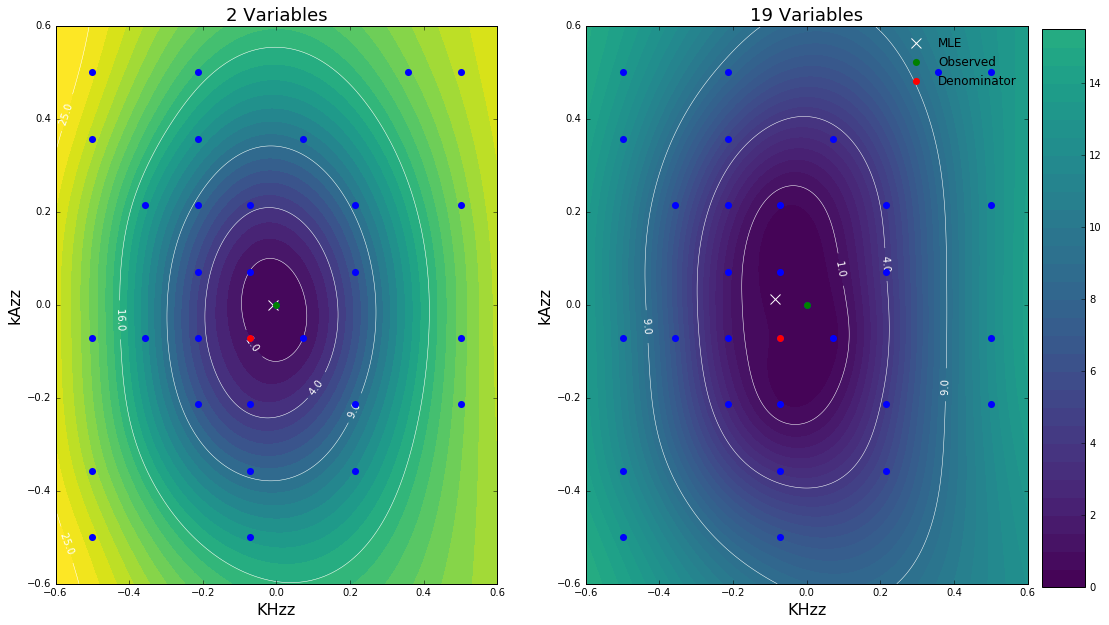

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
plt.rcParams["figure.figsize"] = (12, 10)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, Matern

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

ax = axes.flat[0]

gp = GaussianProcessRegressor(alpha=0.0, normalize_y=True, 
                              kernel=C(1.0) * Matern(1.0, length_scale_bounds="fixed"))
gp.fit(theta[:29, 1:], llr_pbyp_19var)

xi = np.linspace(-0.6, 0.6, 500)
yi = np.linspace(-0.6, 0.6, 500)
    
xx, yy = np.meshgrid(xi, yi)
zz, std = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
zi = zz.reshape(xx.shape)

mle1 = np.unravel_index(zi.argmin(),zi.shape)
zi -= zi[mle1]
zi *= 2.
cs1 = ax.contour(xi, yi, zi, [1.,4.,9.,16.,25.], linewidths=0.5, colors='w')
cs1.levels = [nf(val) for val in cs1.levels]
ax.clabel(cs1, cs1.levels, inline=True, fmt=fmt, fontsize=10)
cs1 = ax.contourf(xi, yi, zi, 30, cmap="viridis",
                  vmax=25., vmin=0.0)

ax.scatter(theta[:, 1], theta[:, 2], marker='o', c='b', s=50, lw=0, zorder=10)
ax.scatter([xi[mle1[0]]], [yi[mle1[1]]], marker='x', c='w', s=100, zorder=10)

ax.scatter([theta[observed, 1]], [theta[observed, 2]], marker='o', c='g', s=50, lw=0, zorder=10)
ax.scatter([theta[theta1, 1]], [theta[theta1, 2]], marker='o', c='r', s=50, lw=0, zorder=10)

ax.set_xlabel("KHzz", size=16)
ax.set_ylabel("kAzz", size=16)
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_title("2 Variables", size=18)

ax = axes.flat[1]
gp = GaussianProcessRegressor(alpha=0.0, normalize_y=True, 
                              kernel=C(1.0) * Matern(1.0, length_scale_bounds="fixed"))
gp.fit(theta[:29, 1:], llr_pbyp_2var)

xi = np.linspace(-0.6, 0.6, 500)
yi = np.linspace(-0.6, 0.6, 500)
    
xx, yy = np.meshgrid(xi, yi)
zz, std = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
zi = zz.reshape(xx.shape)

mle2 = np.unravel_index(zi.argmin(),zi.shape)
zi -= zi[mle2]
zi *= 2.
cs2 = ax.contour(xi, yi, zi, [1.,4.,9.,16.,25.], linewidths=0.5, colors='w')
cs2.levels = [nf(val) for val in cs2.levels]
ax.clabel(cs2, cs2.levels, inline=True, fmt=fmt, fontsize=10)
cs2 = ax.contourf(xi, yi, zi, 30, cmap="viridis",
                  vmax=25., vmin=0.0)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.12, 0.03, 0.775])
fig.colorbar(cs2, cax=cbar_ax)

ax.scatter(theta[:, 1], theta[:, 2], marker='o', c='b', s=50, lw=0, zorder=10)

smle = ax.scatter([xi[mle2[0]]], [yi[mle2[1]]], marker='x', c='w', s=100, zorder=10)

sobs = ax.scatter([theta[observed, 1]], [theta[observed, 2]], marker='o', c='g', s=50, lw=0, zorder=10)
sden = ax.scatter([theta[theta1, 1]], [theta[theta1, 2]], marker='o', c='r', s=50, lw=0, zorder=10)

lines = [smle, sobs, sden]
labels = ['MLE', 'Observed', 'Denominator']

ax.legend(lines, labels, frameon=False, prop={'size':12}, scatterpoints=1)


ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_title("19 Variables",size=18)
ax.set_xlabel("KHzz", size=16)
ax.set_ylabel("kAzz", size=16)
plt.show()

In [8]:
c_min = [-0.6, -0.6]
c_max = [0.6, 0.6]
npoints = 20 # Number of values in the fitting grid

csarray_0 = np.linspace(c_min[0], c_max[0], npoints)
csarray_1 = np.linspace(c_min[1], c_max[1], npoints)


/afs/cern.ch/user/j/jpavezse/.local/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:304: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


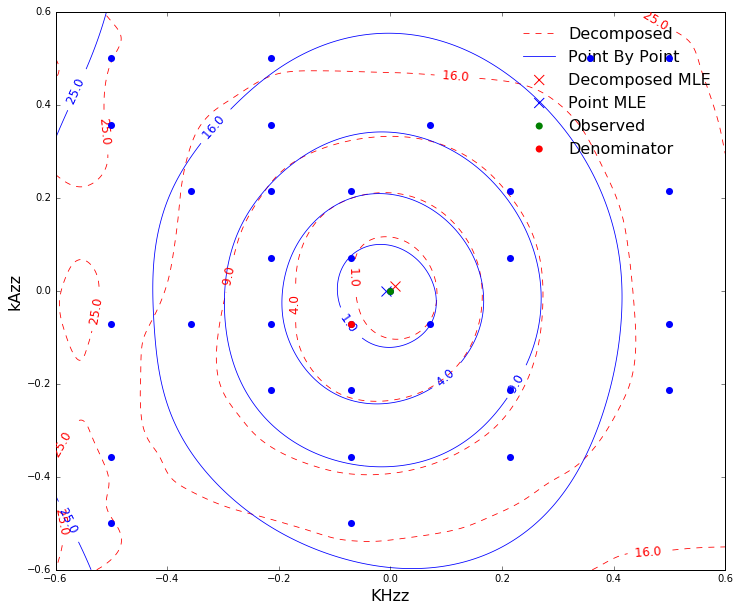

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
plt.rcParams["figure.figsize"] = (12, 10)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, Matern

from itertools import product

thetas = np.array([x for x in product(csarray_0, csarray_1)])
llr = llr_decomp_19var.flatten()

gp = GaussianProcessRegressor(alpha=0.0, normalize_y=True, 
                              kernel=C(1.0) * Matern(1.0, length_scale_bounds="fixed"))
gp.fit(thetas, llr)

xi = np.linspace(-0.6, 0.6, 500)
yi = np.linspace(-0.6, 0.6, 500)
    
xx, yy = np.meshgrid(xi, yi)
zz, std = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
zi = zz.reshape(xx.shape)

mle1 = np.unravel_index(zi.argmin(),zi.shape)
zi -= zi[mle1]
zi *= 2.
cs1 = plt.contour(xi, yi, zi, [1.,4.,9.,16.,25.], linewidths=0.8, colors='r', linestyles='dashed')
cs1.levels = [nf(val) for val in cs1.levels]

plt.clabel(cs1, cs1.levels, inline=True, fmt=fmt, fontsize=12)

gp = GaussianProcessRegressor(alpha=0.0, normalize_y=True, 
                              kernel=C(1.0) * Matern(1.0, length_scale_bounds="fixed"))
gp.fit(theta[:29, 1:], llr_pbyp_19var)

xi = np.linspace(-0.6, 0.6, 500)
yi = np.linspace(-0.6, 0.6, 500)
    
xx, yy = np.meshgrid(xi, yi)
zz, std = gp.predict(np.c_[xx.ravel(), yy.ravel()], return_std=True)
zi = zz.reshape(xx.shape)

mle2 = np.unravel_index(zi.argmin(),zi.shape)
zi -= zi[mle2]
zi *= 2.
cs2 = plt.contour(xi, yi, zi, [1.,4.,9.,16.,25.], linewidths=0.8, colors='b')
cs2.levels = [nf(val) for val in cs2.levels]

plt.clabel(cs2, cs2.levels, inline=True, fmt=fmt, fontsize=12)

plt.scatter(theta[:, 1], theta[:, 2], marker='o', c='b', s=50, lw=0, zorder=10)
smle_1 = plt.scatter([xi[mle1[0]]], [yi[mle1[1]]], marker='x', c='r', s=100, zorder=10, label='mle')
smle_2 = plt.scatter([xi[mle2[0]]], [yi[mle2[1]]], marker='x', c='b', s=100, zorder=10)

sobs = plt.scatter([theta[observed, 1]], [theta[observed, 2]], marker='o', c='g', s=50, lw=0, zorder=10)
sden = plt.scatter([theta[theta1, 1]], [theta[theta1, 2]], marker='o', c='r', s=50, lw=0, zorder=10)

#plt.colorbar() 
lines = [cs1.collections[0], cs2.collections[0], smle_1, smle_2, sobs, sden]
labels = ['Decomposed', 'Point By Point', 'Decomposed MLE', 'Point MLE', 'Observed', 'Denominator']

plt.legend(lines, labels, frameon=False, prop={'size':16}, scatterpoints=1)

plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.xlabel("KHzz", size=16)
plt.ylabel("kAzz", size=16)
plt.show()

# Pairwise distributions of the features

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

num = 0
den = 8
X_num = np.loadtxt(base_dir + "data_%d.dat" % num)
X_den = np.loadtxt(base_dir + "data_%d.dat" % den)

for j in range(X_num.shape[1]):
    plt.title(feature_names[j])
    
    val_num = [v for v in X_num[:, j] if v > -999]
    val_den = [v for v in X_den[:, j] if v > -999]
    vmin = min(np.min(val_num), np.min(val_den))
    vmax = max(np.max(val_num), np.max(val_den))
    
    plt.hist(val_num, range=(vmin, vmax), bins=30, normed=1, histtype="step")
    plt.hist(val_den, range=(vmin, vmax), bins=30, normed=1, histtype="step")
    plt.show()

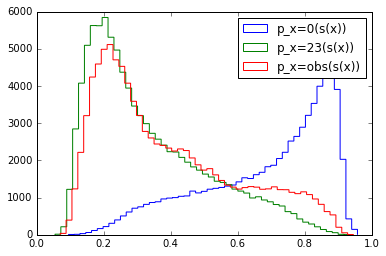

In [15]:
num = 0
den = 23
ratio = make_ratio(num, den)
X = np.loadtxt("data/data_%d.dat" % num)
plt.hist(ratio.classifier_.predict_proba(X)[:, 0], bins=50, histtype="step", label="p_x=0(s(x))")
X = np.loadtxt("data/data_%d.dat" % den)
plt.hist(ratio.classifier_.predict_proba(X)[:, 0], bins=50, histtype="step", label="p_x=23(s(x))")
plt.hist(ratio.classifier_.predict_proba(X_observed)[:, 0], bins=50, histtype="step", label="p_x=obs(s(x))")
plt.legend()
plt.show()

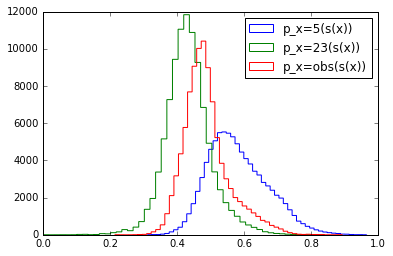

In [16]:
num = 5
den = 23
ratio = make_ratio(num, den)
X = np.loadtxt("data/data_%d.dat" % num)
plt.hist(ratio.classifier_.predict_proba(X)[:, 0], bins=50, histtype="step", label="p_x=5(s(x))")
X = np.loadtxt("data/data_%d.dat" % den)
plt.hist(ratio.classifier_.predict_proba(X)[:, 0], bins=50, histtype="step", label="p_x=23(s(x))")
plt.hist(ratio.classifier_.predict_proba(X_observed)[:, 0], bins=50, histtype="step", label="p_x=obs(s(x))")
plt.legend()
plt.show()

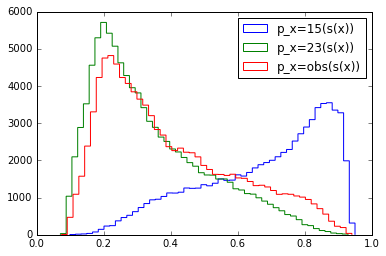

In [17]:
num = 15
den = 23
ratio = make_ratio(num, den)
X = np.loadtxt("data/data_%d.dat" % num)
plt.hist(ratio.classifier_.predict_proba(X)[:, 0], bins=50, histtype="step", label="p_x=15(s(x))")
X = np.loadtxt("data/data_%d.dat" % den)
plt.hist(ratio.classifier_.predict_proba(X)[:, 0], bins=50, histtype="step", label="p_x=23(s(x))")
plt.hist(ratio.classifier_.predict_proba(X_observed)[:, 0], bins=50, histtype="step", label="p_x=obs(s(x))")
plt.legend()
plt.show()